# Script XA DSA
This notebook imports necessary libraries and data from Excel files to work with ...

In [1]:
import dt_ids7_export_module as bh_utils
import mapping_module as bh_map
import plot_module as bh_plot

# Get the name of the computer:
import socket
hostname = socket.gethostname()
if hostname == 'BHs-Desktop':
    path = 'E:\\'
elif hostname == 'BH-XPS':
    path = 'G:\\'
else:
    path = 'D:\\'


# Import the IDS7 data:
root_folder = path + "repdoser\\IDS7\\2024\\"
df_ids7 = bh_utils.import_excel_files_to_dataframe(root_folder)

# Import the IDS7 data:
root_folder = path + "repdoser\\DoseTrack - Serienivå\\2024\\"
df_dt = bh_utils.import_excel_files_to_dataframe(root_folder)

Reading D:\repdoser\IDS7\2024\2024-01 - OUS.xlsx...
Reading D:\repdoser\IDS7\2024\2024-02 - OUS.xlsx...
Reading D:\repdoser\IDS7\2024\2024-03 - OUS.xlsx...
Reading D:\repdoser\IDS7\2024\2024-04 - OUS.xlsx...
Reading D:\repdoser\IDS7\2024\2024-05 - OUS.xlsx...
Reading D:\repdoser\IDS7\2024\2024-06 - OUS.xlsx...
Reading D:\repdoser\IDS7\2024\2024-07 - OUS.xlsx...
Reading D:\repdoser\IDS7\2024\2024-08 - OUS.xlsx...
Reading D:\repdoser\IDS7\2024\2024-09 - OUS.xlsx...
Reading D:\repdoser\IDS7\2024\2024-10 - OUS.xlsx...
Reading D:\repdoser\IDS7\2024\2024-11 - OUS.xlsx...
Reading D:\repdoser\IDS7\2024\2024-12 - OUS.xlsx...
Reading D:\repdoser\DoseTrack - Serienivå\2024\2024-01 - OUS.xlsx...
Reading D:\repdoser\DoseTrack - Serienivå\2024\2024-02 - OUS.xlsx...
Reading D:\repdoser\DoseTrack - Serienivå\2024\2024-03 - OUS.xlsx...
Reading D:\repdoser\DoseTrack - Serienivå\2024\2024-04 - OUS.xlsx...
Reading D:\repdoser\DoseTrack - Serienivå\2024\2024-05 - OUS.xlsx...
Reading D:\repdoser\DoseTrack -

In [2]:
# Run all cleanups, filters and checks:
df_ids7 = bh_utils.run_all_cleanup_filters_and_checks(df_ids7, df_dt, True)
# Merge the dataframes:
data = bh_utils.merge_ids7_dt(df_ids7, df_dt, True)

Dropping unnecessary column: Prioritet- og lesemerkeikon
Dropping unnecessary column: Lagt til i demonstrasjon-ikon
Dropping unnecessary column: Status
Number of rows with NaT in the column "Bestilt dato og tidspunkt": 1530
Number of cancelled procedures: 295
Number of non-human subjects: 101
Number of rows with invalid accession number: 7
2211     NNRA000009433721
11806    NNRA000009532398
11807    NNRA000009578608
18065    NNUL000009507772
18066    NNUL000009507772
18067    NNUL000009612281
27994    NBOU000012935221
Name: Henvisnings-ID, dtype: object
Number of accession numbers in IDS7: 21339
Number of accession numbers in IDS7 not in DoseTrack: 6475
Without this column, we cannot keep track of which procedures are on the same patient.


User Guide to get the "Pasienter" column in the IDS7 data:


Note that the "Pasient column is not a column in IDS7, but must be created manually for anonymity reasons.
This can be done in excel after export to a safe location using the following met

In [3]:
import mapping_dict_elfys as elfys_dict
# Representative doser for radiologisk Rikshospital
data = data[data['Modality Room'].isin(['KRH_Elfys1', 'KRH_Elfys2', 'KRH_Elfys3', 'KRH_Elfys4', 'KRH_LAB39', 'KRH_Lab13'])]
import importlib
importlib.reload(elfys_dict)


# Get the mapping dictionary:
mapping_dict = elfys_dict.get_elfys_mapping_dict()
data = bh_map.map_procedures(data, mapping_dict, True)


Mapping procedures...

RGA Cor Ablasjon SVT (int.) -> RGA Cor Ablasjon SVT (int.) m og u 3D
RGA Cor Ablasjon SVT m 3D (int.) -> RGA Cor Ablasjon SVT (int.) m og u 3D
RGA Cor Ablasjon VT m 3D (int.) -> RGA Cor Ablasjon VT (int.) m 3D
RGA Cor Ablasjon Atrieflimmer (int.) -> RGA Cor Ablasjon Atrieflimmer (int.) m og u 3D
WARNING! No procedures were targeted by this mapping!


RGA Cor Ablasjon Atrieflimmer med 3D (int.) -> RGA Cor Ablasjon Atrieflimmer (int.) m og u 3D
RGA Cor Pulsed field ablasjon (elektroporasjon) atrieflimmer -> RGA Cor Pulsed field ablasjon (elektroporasjon) atrieflimmer
RGA Cor Cryo Ablasjon Atrieflimmer (int.) -> RGA Cor Cryo Ablasjon Atrieflimmer (int.)
RGA Cor Ablasjon Atrieflutter (int.) & ~Atrieflimmer -> RGA Cor Ablasjon Atrieflutter (int.) m og u 3D
RGA Cor Elfys SVT (int.) -> RGA Cor Elfys VT el. SVT (int.)
RGA Cor Elfys VT (int.) -> RGA Cor Elfys VT el. SVT (int.)
RGA Cor CRT-D (int.) -> RGA Cor CRT-D (int.) ink. CRT-P
RGA Cor CRT-P (int.) -> RGA Cor CRT-D (i

Reporting doses for RGA Cor Ablasjon SVT (int.) m og u 3D:


Alle: n =  502, DAP: Median - 2.4, 95% CI: [2.19 - 2.85] IQR [1.2 - 5.0], Range (0.0 - 45.0).


KRH_Elfys1: n =  116, DAP: Median - 2.68 (Gy*cm2), 95% CI: [1.96 - 3.05] IQR [1.28 - 4.58], Range (0.29 - 27.32).
KRH_Elfys2: n =   47, DAP: Median - 2.79 (Gy*cm2), 95% CI: [1.53 - 3.64] IQR [1.14 - 4.55], Range (0.36 - 41.12).
KRH_Elfys3: n =  186, DAP: Median - 2.43 (Gy*cm2), 95% CI: [1.97 - 3.04] IQR [1.04 - 5.52], Range (0.02 - 45.0).
KRH_Elfys4: n =  153, DAP: Median - 2.35 (Gy*cm2), 95% CI: [1.86 - 2.91] IQR [1.18 - 4.85], Range (0.28 - 28.06).
--------------------------------------------------




c:\Users\bjorn\Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


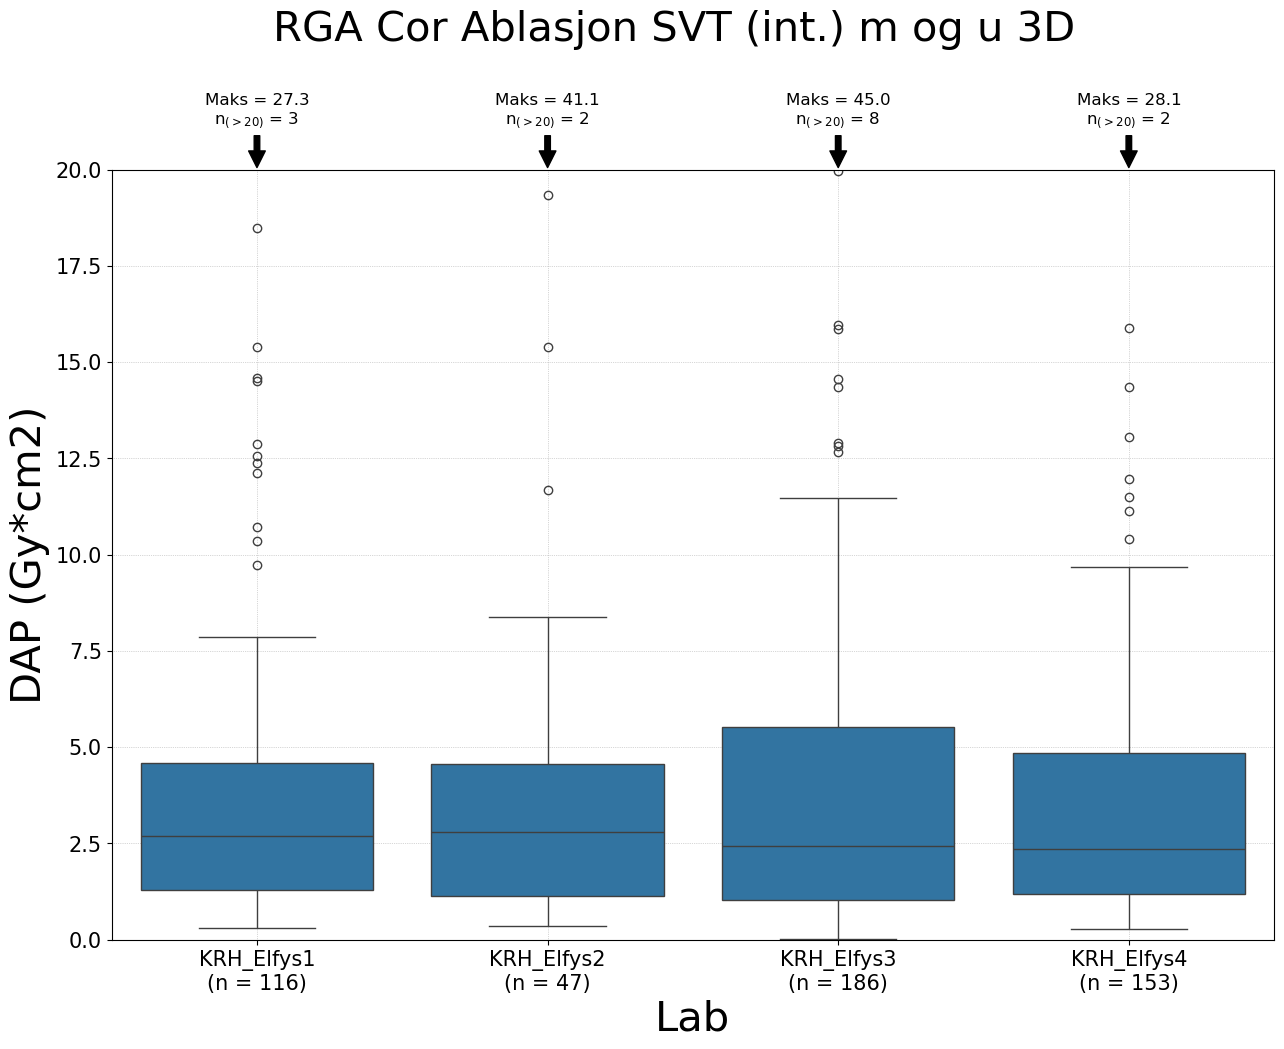

In [4]:
procedure = 'RGA Cor Ablasjon SVT (int.) m og u 3D'
export = False
bh_plot.plot_representative_dose(data, procedure, 20, export)

Reporting doses for RGA Cor Ablasjon VT (int.) m 3D:


Alle: n =  163, DAP: Median - 3.1, 95% CI: [2.17 - 4.04] IQR [1.3 - 6.3], Range (0.1 - 64.6).


KRH_Elfys1: n =  100, DAP: Median - 3.79 (Gy*cm2), 95% CI: [2.29 - 4.92] IQR [1.33 - 6.32], Range (0.15 - 64.64).
KRH_Elfys2: n =   10, DAP: Median - 3.05 (Gy*cm2), 95% CI: [0.7 - 5.15] IQR [0.91 - 4.67], Range (0.52 - 10.23).
KRH_Elfys3: n =   52, DAP: Median - 2.13 (Gy*cm2), 95% CI: [1.74 - 3.55] IQR [1.37 - 6.1], Range (0.15 - 24.51).
KRH_Elfys4: n =    1, DAP: Median - 43.49 (Gy*cm2), 95% CI: [43.49 - 43.49] IQR [43.49 - 43.49], Range (43.49 - 43.49).
--------------------------------------------------




c:\Users\bjorn\Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


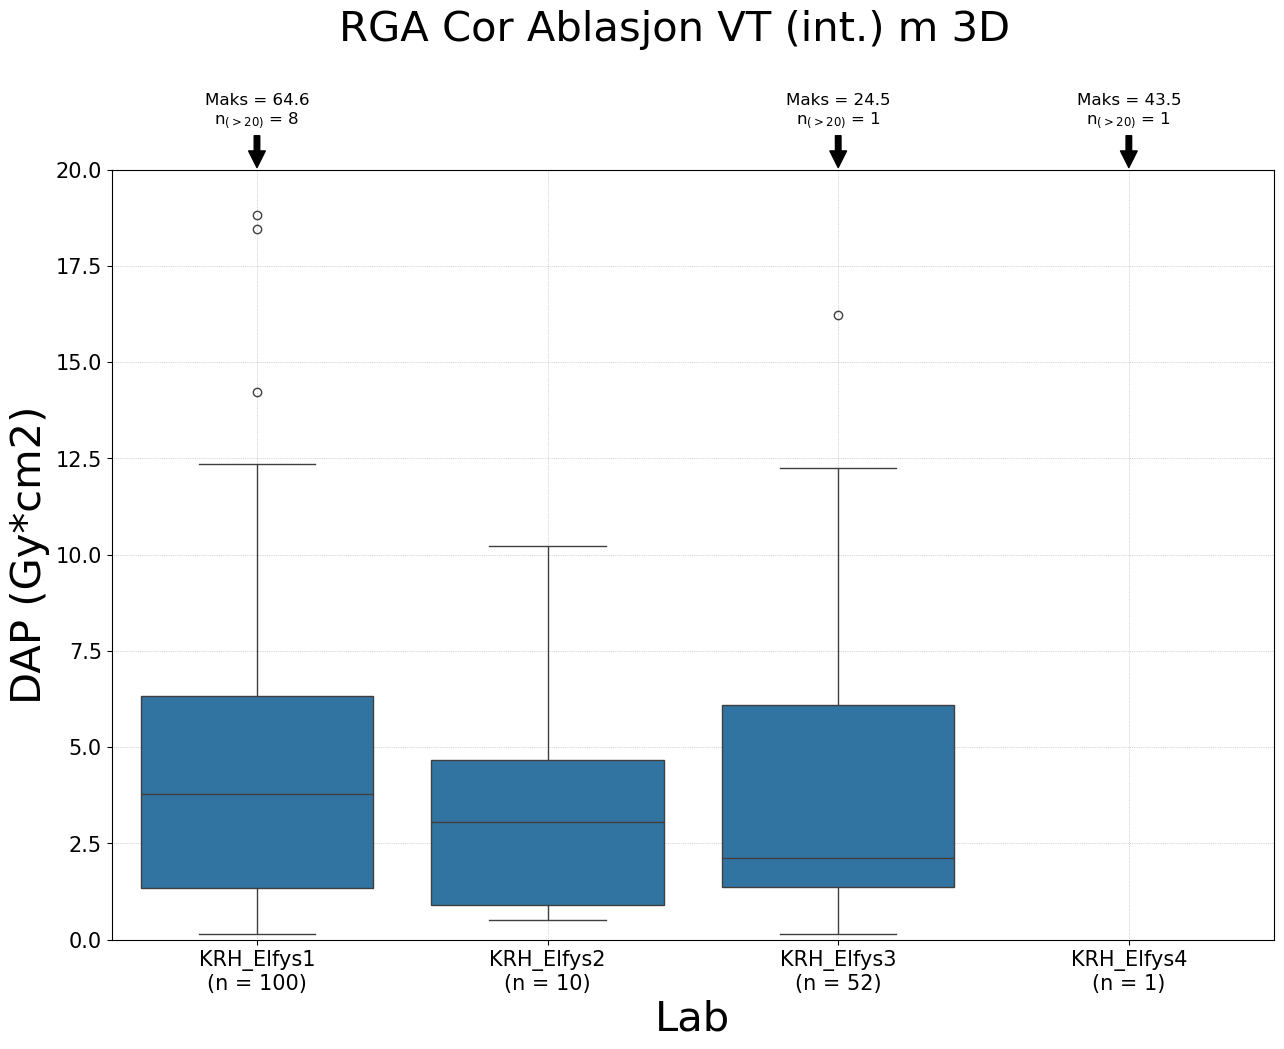

In [5]:
procedure = 'RGA Cor Ablasjon VT (int.) m 3D'
bh_plot.plot_representative_dose(data, procedure, 20, export)

Reporting doses for RGA Cor Ablasjon Atrieflimmer (int.) m og u 3D:


Alle: n =  231, DAP: Median - 3.4, 95% CI: [2.96 - 3.99] IQR [2.0 - 6.2], Range (0.5 - 82.4).


KRH_Elfys1: n =   30, DAP: Median - 3.15 (Gy*cm2), 95% CI: [2.33 - 3.79] IQR [2.1 - 5.27], Range (0.49 - 17.55).
KRH_Elfys2: n =  186, DAP: Median - 3.74 (Gy*cm2), 95% CI: [3.04 - 4.39] IQR [2.01 - 6.23], Range (0.46 - 39.58).
KRH_Elfys3: n =   15, DAP: Median - 2.32 (Gy*cm2), 95% CI: [1.73 - 4.56] IQR [1.74 - 5.89], Range (0.74 - 82.41).
--------------------------------------------------




c:\Users\bjorn\Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


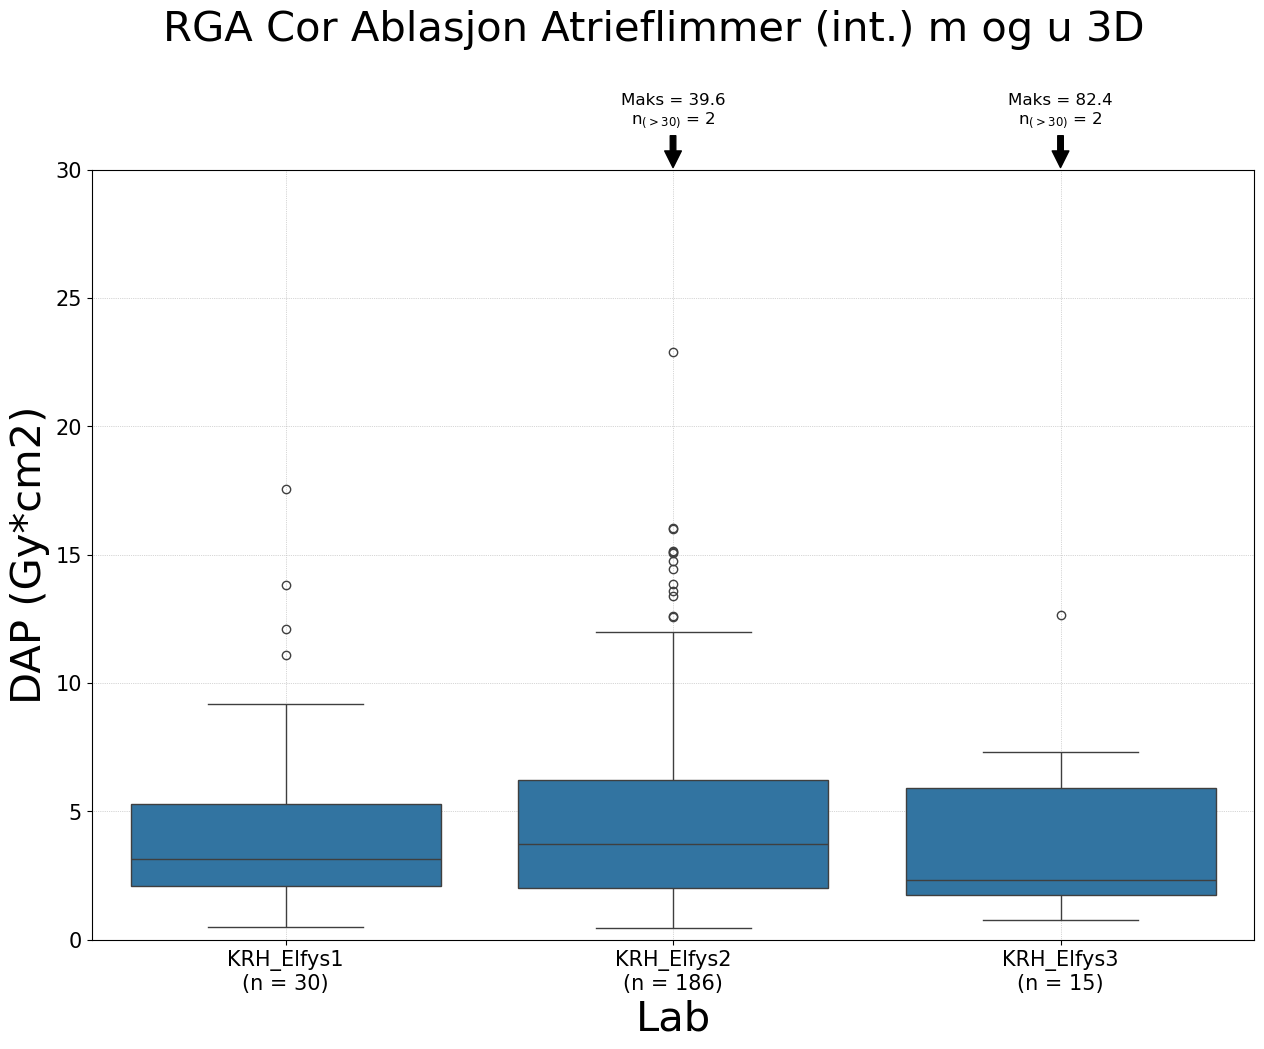

In [6]:
procedure = 'RGA Cor Ablasjon Atrieflimmer (int.) m og u 3D'
export = False
bh_plot.plot_representative_dose(data, procedure, 30, export)

Reporting doses for RGA Cor Pulsed field ablasjon (elektroporasjon) atrieflimmer:


Alle: n =   29, DAP: Median - 4.9, 95% CI: [3.63 - 6.45] IQR [2.6 - 8.0], Range (0.9 - 48.4).


KRH_Elfys1: n =   29, DAP: Median - 4.91 (Gy*cm2), 95% CI: [3.63 - 6.45] IQR [2.64 - 7.99], Range (0.91 - 48.41).
--------------------------------------------------




c:\Users\bjorn\Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


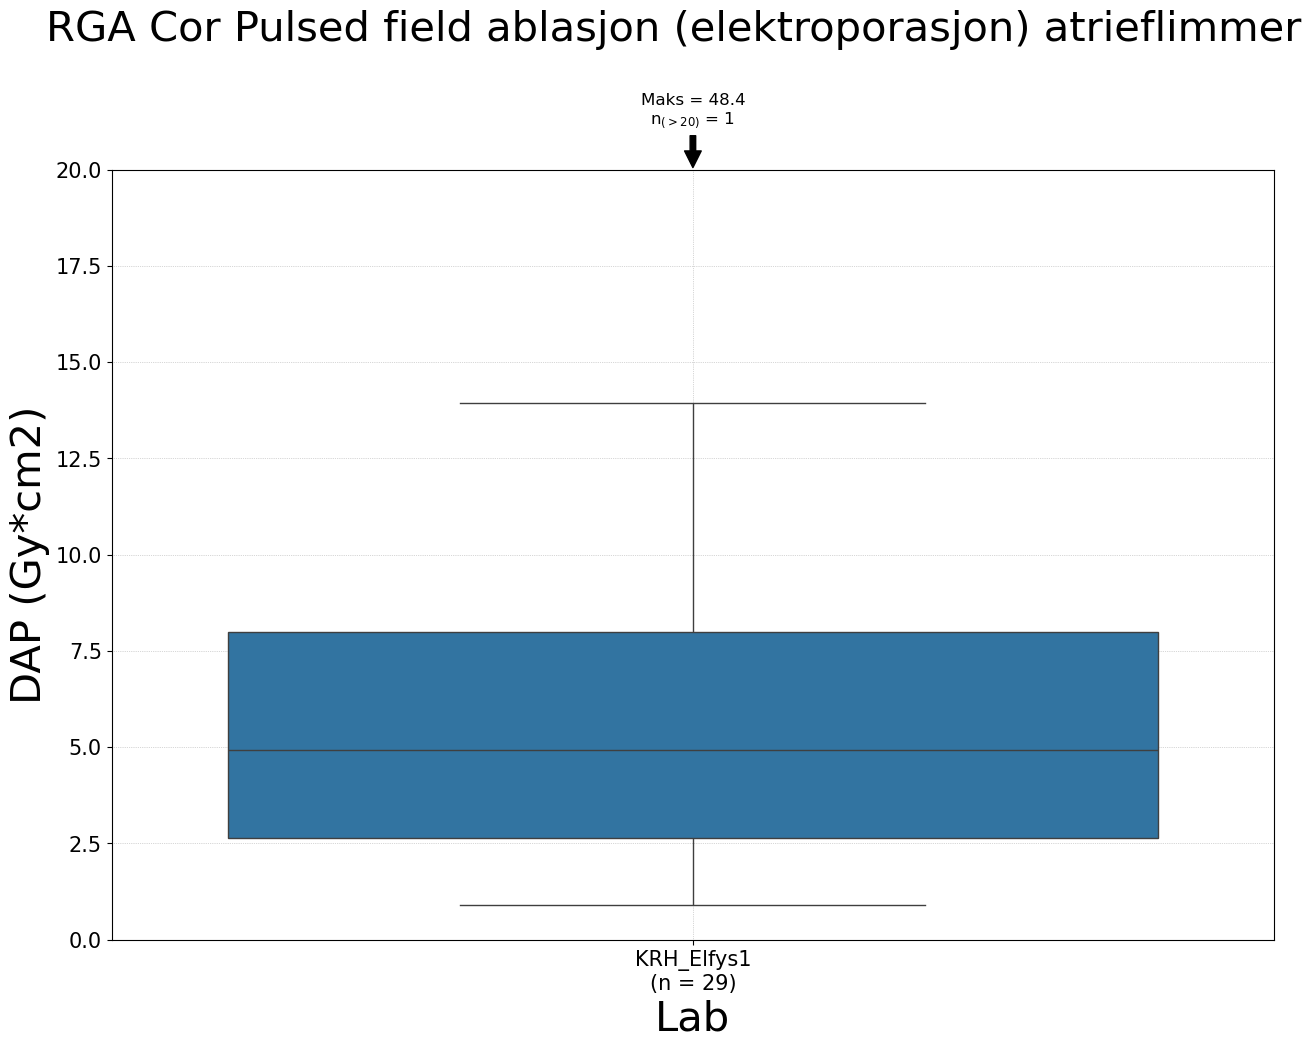

In [7]:
procedure = 'RGA Cor Pulsed field ablasjon (elektroporasjon) atrieflimmer'
bh_plot.plot_representative_dose(data, procedure, 20, export)

Reporting doses for RGA Cor Cryo Ablasjon Atrieflimmer (int.):


Alle: n =  147, DAP: Median - 8.6, 95% CI: [7.16 - 10.03] IQR [5.1 - 13.1], Range (1.9 - 41.2).


KRH_Elfys1: n =   23, DAP: Median - 7.53 (Gy*cm2), 95% CI: [5.65 - 9.23] IQR [4.62 - 12.07], Range (1.91 - 41.23).
KRH_Elfys2: n =  124, DAP: Median - 9.14 (Gy*cm2), 95% CI: [7.05 - 10.34] IQR [5.12 - 13.12], Range (2.14 - 37.93).
--------------------------------------------------




c:\Users\bjorn\Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


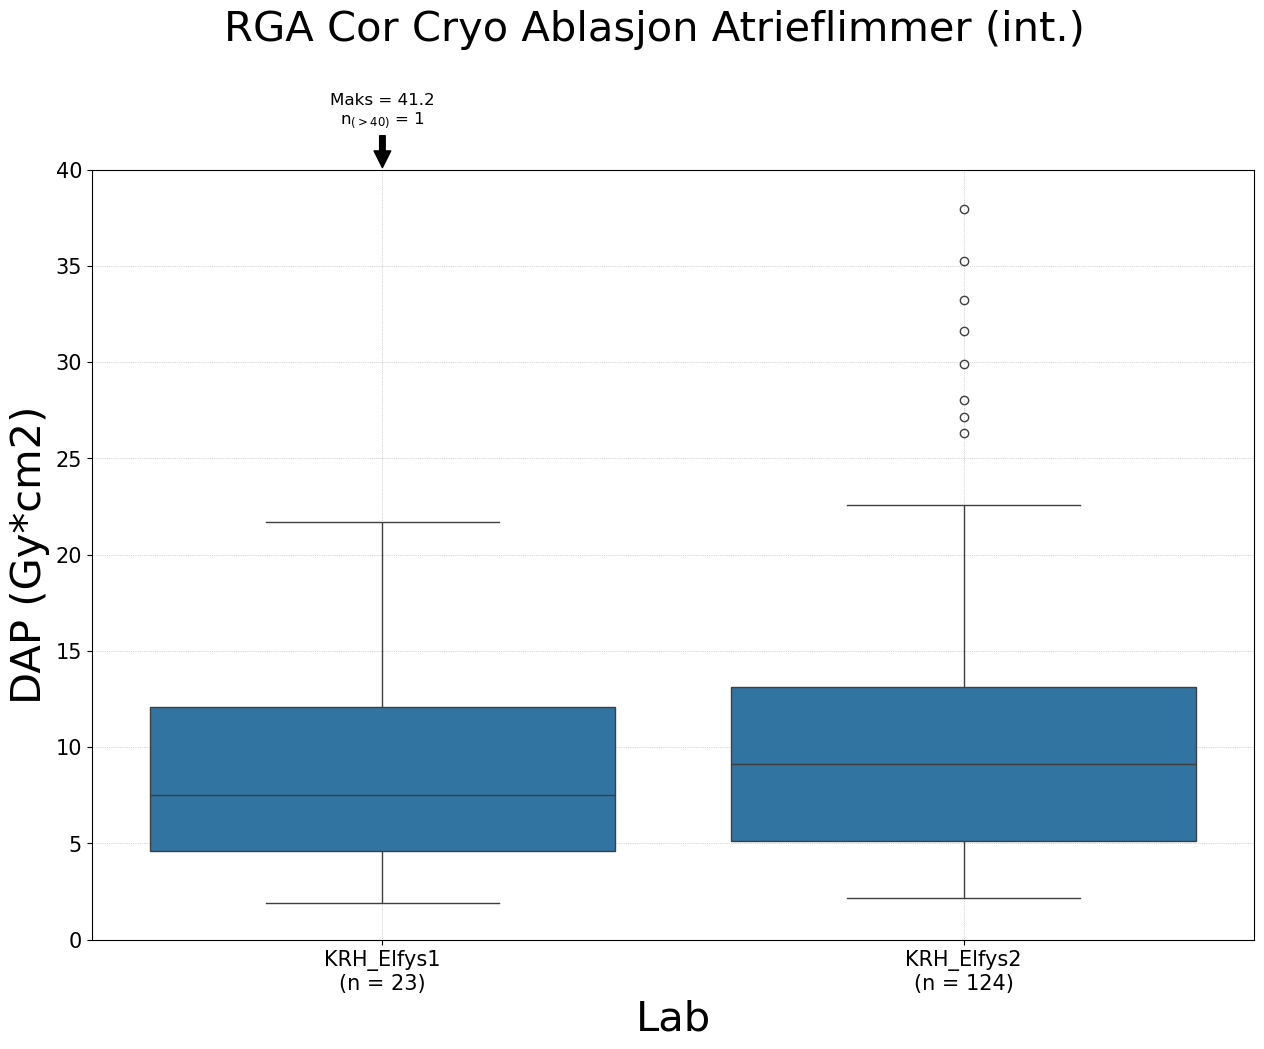

In [8]:
procedure = 'RGA Cor Cryo Ablasjon Atrieflimmer (int.)'
bh_plot.plot_representative_dose(data, procedure, 40, export)

Reporting doses for RGA Cor Ablasjon Atrieflutter (int.) m og u 3D:


Alle: n =  259, DAP: Median - 3.5, 95% CI: [2.79 - 4.16] IQR [1.8 - 7.1], Range (0.0 - 66.6).


KRH_Elfys1: n =   49, DAP: Median - 5.17 (Gy*cm2), 95% CI: [3.36 - 7.08] IQR [2.53 - 8.77], Range (0.45 - 66.57).
KRH_Elfys2: n =   33, DAP: Median - 3.04 (Gy*cm2), 95% CI: [1.44 - 5.04] IQR [1.25 - 5.14], Range (0.8 - 42.99).
KRH_Elfys3: n =   60, DAP: Median - 4.25 (Gy*cm2), 95% CI: [2.82 - 5.56] IQR [2.04 - 7.8], Range (0.38 - 25.35).
KRH_Elfys4: n =  117, DAP: Median - 2.62 (Gy*cm2), 95% CI: [2.24 - 3.46] IQR [1.76 - 5.53], Range (0.01 - 33.18).
--------------------------------------------------




c:\Users\bjorn\Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


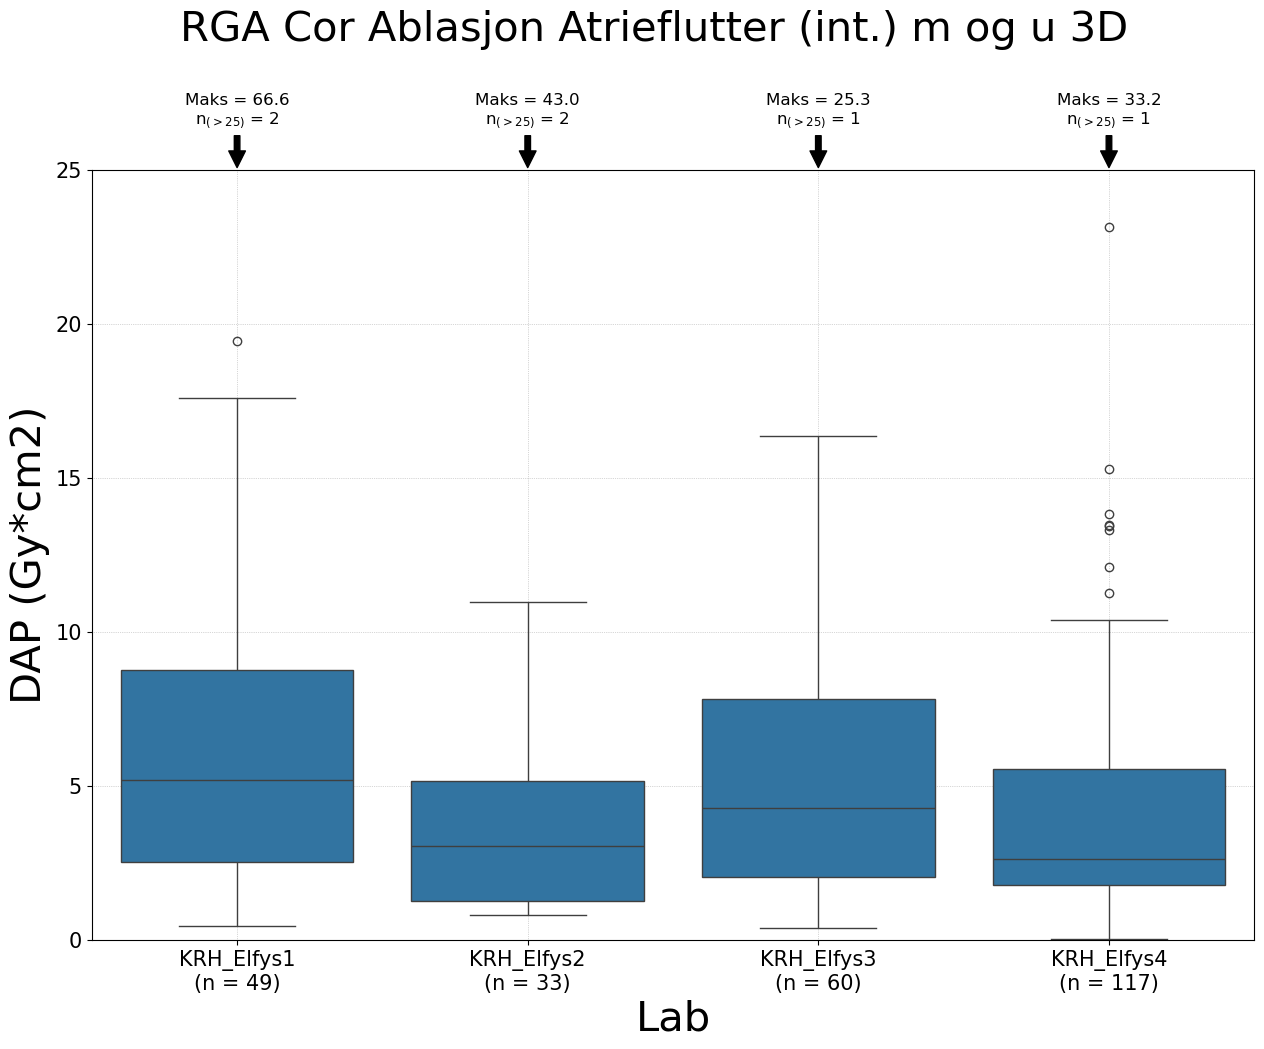

In [9]:
procedure = 'RGA Cor Ablasjon Atrieflutter (int.) m og u 3D'
bh_plot.plot_representative_dose(data, procedure, 25, export)

Reporting doses for RGA Cor Elfys VT el. SVT (int.):


Alle: n =  184, DAP: Median - 1.1, 95% CI: [0.84 - 1.4] IQR [0.5 - 2.6], Range (0.1 - 43.5).


KRH_Elfys1: n =   61, DAP: Median - 0.84 (Gy*cm2), 95% CI: [0.73 - 1.46] IQR [0.44 - 2.11], Range (0.07 - 8.53).
KRH_Elfys2: n =   20, DAP: Median - 0.62 (Gy*cm2), 95% CI: [0.46 - 1.26] IQR [0.41 - 1.37], Range (0.16 - 10.78).
KRH_Elfys3: n =   48, DAP: Median - 1.43 (Gy*cm2), 95% CI: [0.91 - 2.1] IQR [0.58 - 2.77], Range (0.11 - 23.39).
KRH_Elfys4: n =   55, DAP: Median - 1.34 (Gy*cm2), 95% CI: [0.87 - 2.16] IQR [0.57 - 3.06], Range (0.12 - 43.49).
--------------------------------------------------




c:\Users\bjorn\Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


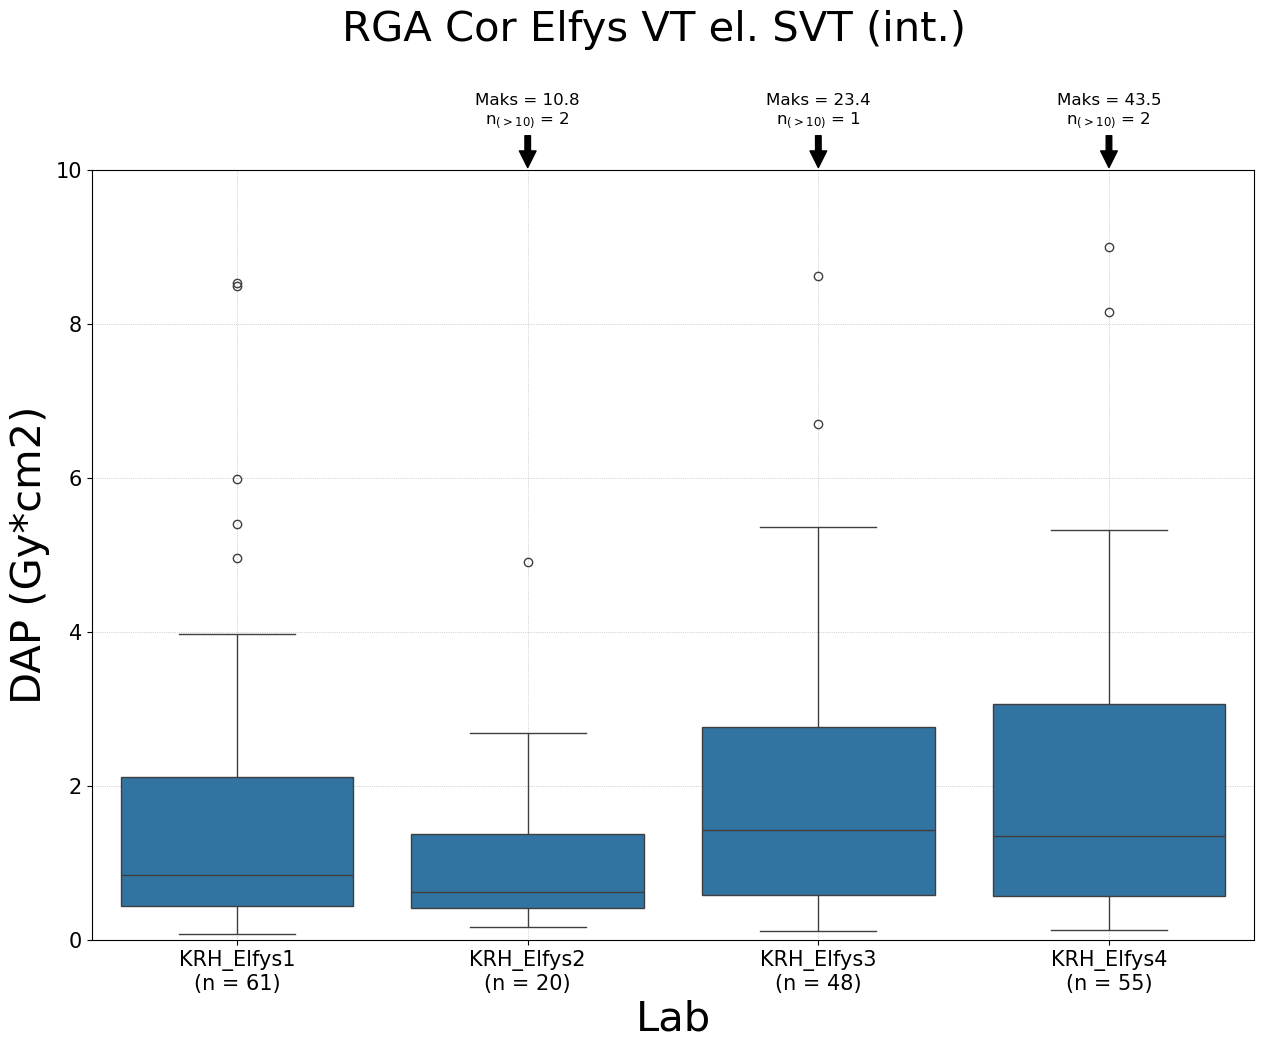

In [10]:
procedure = 'RGA Cor Elfys VT el. SVT (int.)'
bh_plot.plot_representative_dose(data, procedure, 10, export)

Reporting doses for RGA Cor CRT-D (int.) ink. CRT-P:


Alle: n =  120, DAP: Median - 11.3, 95% CI: [8.89 - 12.68] IQR [5.5 - 19.3], Range (0.9 - 79.5).


KRH_Elfys3: n =    4, DAP: Median - 7.55 (Gy*cm2), 95% CI: [1.48 - 79.49] IQR [3.19 - 28.37], Range (1.48 - 79.49).
KRH_Lab13: n =  116, DAP: Median - 11.38 (Gy*cm2), 95% CI: [8.86 - 13.04] IQR [5.56 - 19.31], Range (0.92 - 75.86).
--------------------------------------------------




c:\Users\bjorn\Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


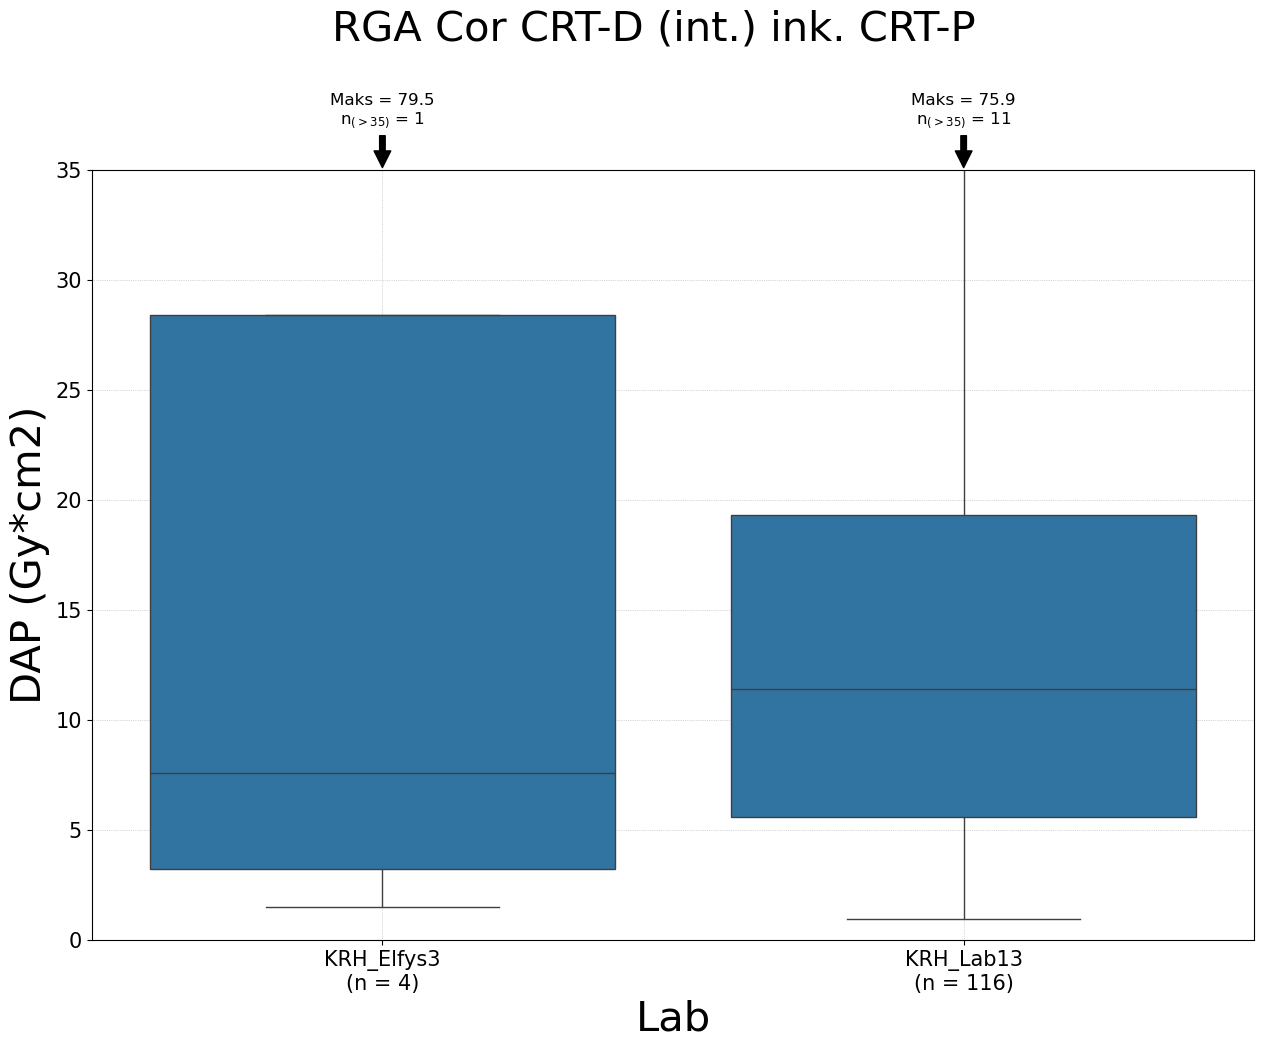

In [11]:
procedure = 'RGA Cor CRT-D (int.) ink. CRT-P'
bh_plot.plot_representative_dose(data, procedure, 35, export)

Reporting doses for RGA Cor Implantasjon PM/ICD (int.) ink. 2k og 1k PM:


Alle: n =  154, DAP: Median - 3.4, 95% CI: [2.85 - 4.23] IQR [2.0 - 7.8], Range (0.4 - 95.3).


KRH_Elfys3: n =   10, DAP: Median - 1.48 (Gy*cm2), 95% CI: [0.85 - 7.69] IQR [1.08 - 2.93], Range (0.39 - 21.68).
KRH_Lab13: n =  144, DAP: Median - 3.71 (Gy*cm2), 95% CI: [2.87 - 4.46] IQR [2.12 - 7.88], Range (0.5 - 95.3).
--------------------------------------------------




c:\Users\bjorn\Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


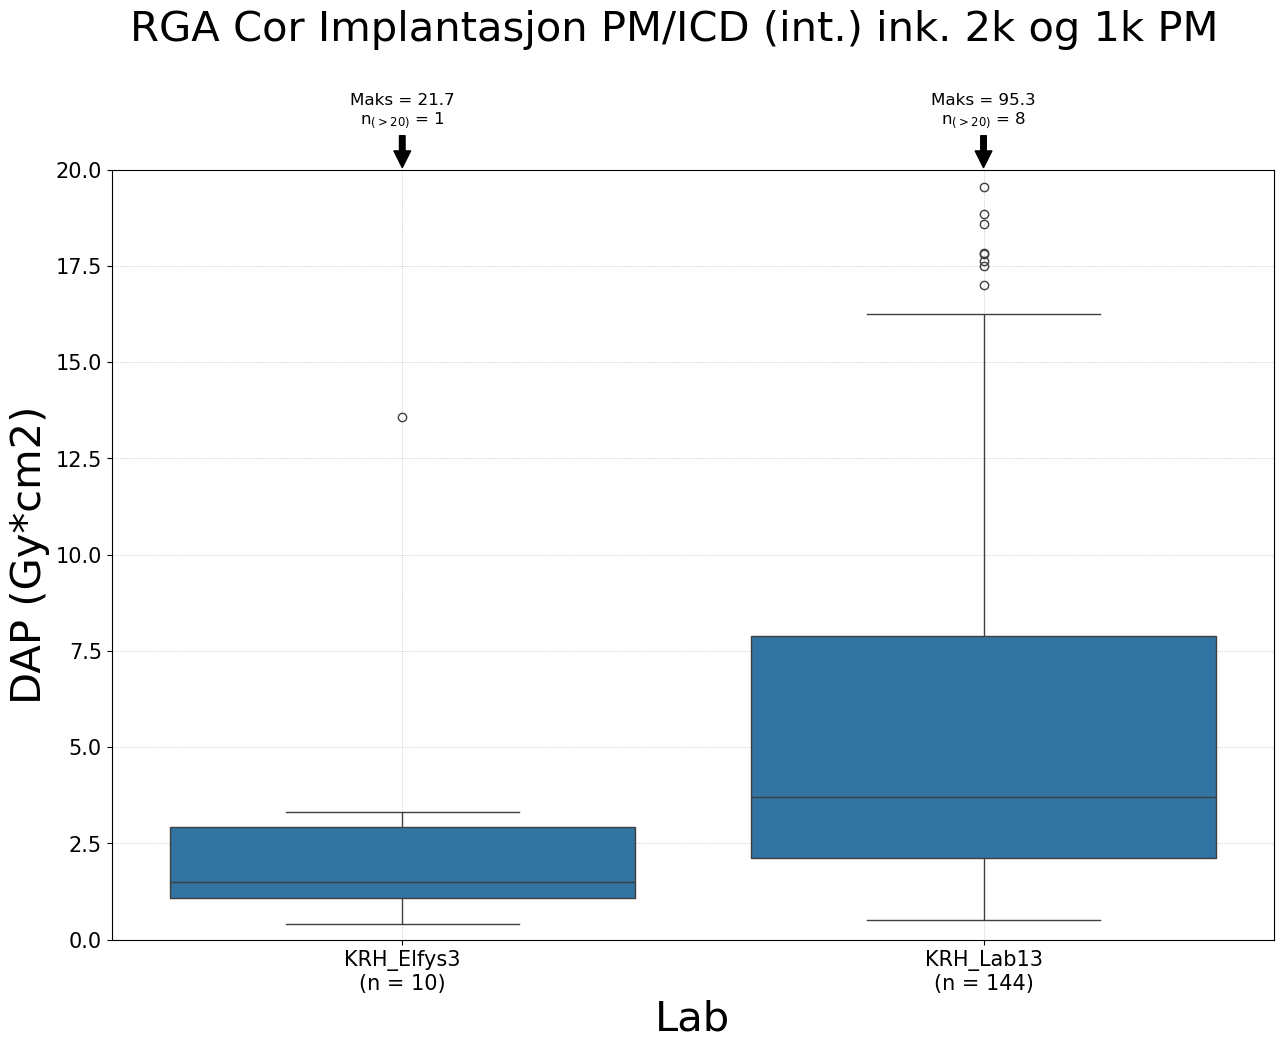

In [12]:
procedure = 'RGA Cor Implantasjon PM/ICD (int.) ink. 2k og 1k PM'
bh_plot.plot_representative_dose(data, procedure, 20, export)

In [ ]:
bh_report.print_summary(data)
bh_plot.plot_representative_dose_by_procedure(data[data!='Unmapped'])

Reporting doses for RGA Cor Biopsi:


Alle: n =  168, DAP: Median - 1.5, 95% CI: [1.26 - 1.74] IQR [0.9 - 2.6], Range (0.0 - 18.7).


KRH_LAB39: n =  168, DAP: Median - 1.53 (Gy*cm2), 95% CI: [1.25 - 1.74] IQR [0.86 - 2.59], Range (0.03 - 18.67).
--------------------------------------------------




c:\Users\bjorn\Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


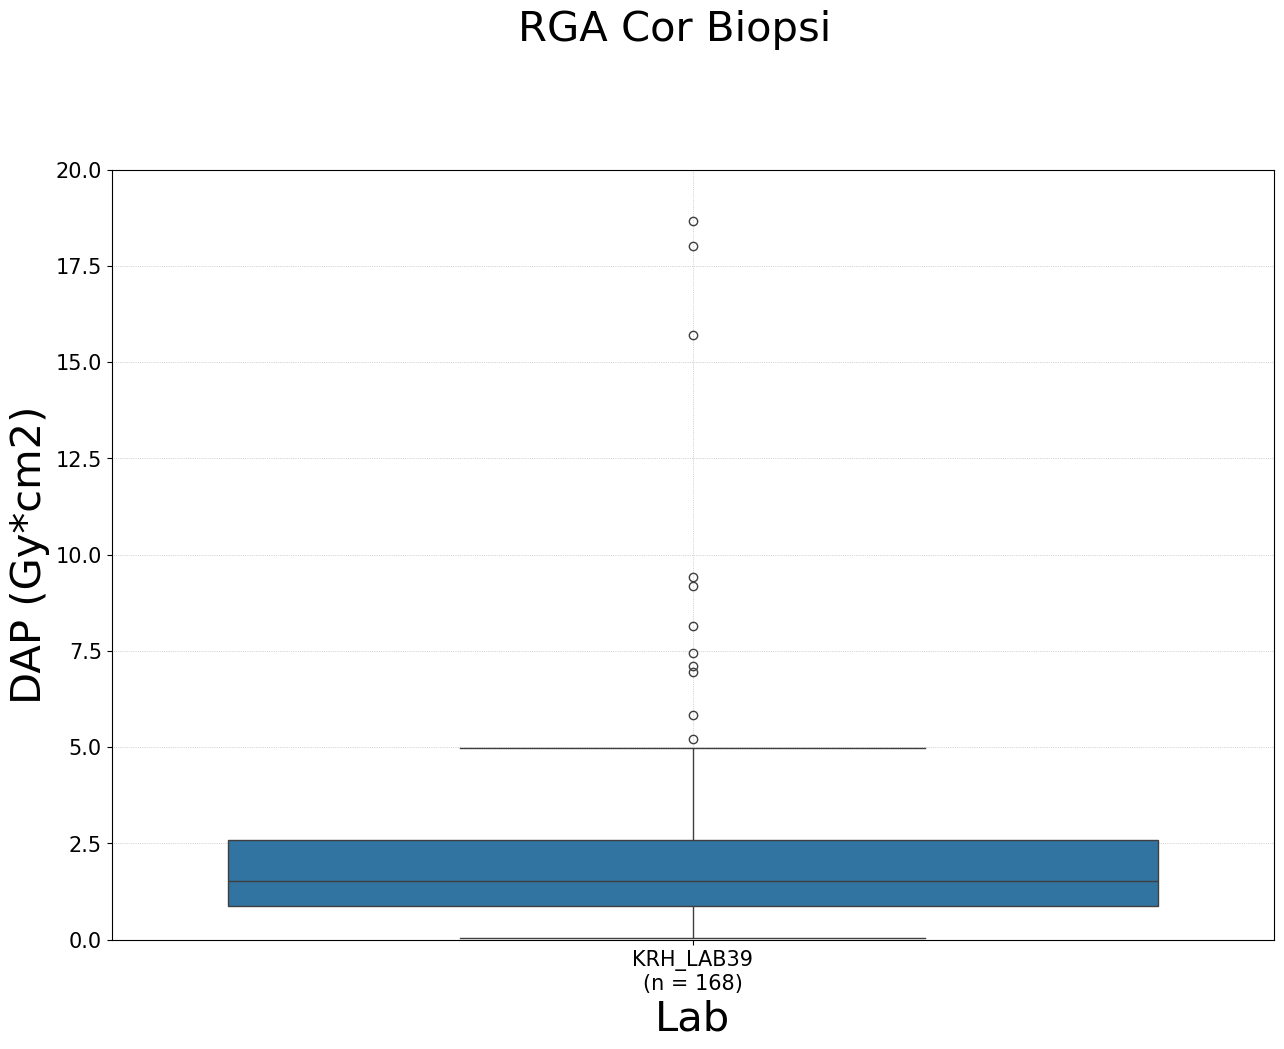

In [ ]:
procedure = 'RGV Cor Biopsi'
export = False
bh_plot.plot_representative_dose(data, procedure, 20, export)